In [2]:
import pandas as pd 
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
import matplotlib.pyplot as plt 

In [3]:
# Import train and test
X_train = pd.read_csv('train_X.csv', header=None)
X_test = pd.read_csv('test_X.csv', header=None)
y_train = np.transpose(pd.read_csv('train_Y.csv', header=None))
y_test = np.transpose(pd.read_csv('test_Y.csv', header=None))

X_train = X_train.values
X_test = X_test.values
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

X_train = X_train[:,[0,2,4]]
X_test = X_test[:,[0,2,4]]

In [4]:
# Train 
LH = np.where(y_train == 1)
RH = np.where(y_train == 2)
FT = np.where(y_train == 3)
TG = np.where(y_train == 4)

LH_ind = y_train[LH]
RH_ind = y_train[RH]
FT_ind = y_train[FT]
TG_ind = y_train[TG]

LH_p = X_train[LH]
RH_p = X_train[RH]
FT_p = X_train[FT]
TG_p = X_train[TG]


X_train = np.concatenate((LH_p, FT_p), axis=0)
y_train = np.concatenate((LH_ind, FT_ind), axis=0)

In [5]:
# Test
LH = np.where(y_test == 1)
RH = np.where(y_test == 2)
FT = np.where(y_test == 3)
TG = np.where(y_test == 4)

LH_ind = y_test[LH]
RH_ind = y_test[RH]
FT_ind = y_test[FT]
TG_ind = y_test[TG]

LH_p = X_test[LH]
RH_p = X_test[RH]
FT_p = X_test[FT]
TG_p = X_test[TG]


X_test = np.concatenate((LH_p, FT_p), axis=0)
y_test = np.concatenate((LH_ind, FT_ind), axis=0)

In [6]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
model = LinearDiscriminantAnalysis()

X = np.concatenate((X_train, X_test), axis=0)
y = np.concatenate((y_train, y_test), axis=0)

# Scale features
sc = StandardScaler()
X = sc.fit_transform(X)

# Evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
recall = cross_val_score(model, X, y, scoring='recall', cv=cv, n_jobs=-1)
precision = cross_val_score(model, X, y, scoring='precision', cv=cv, n_jobs=-1)
# Summarize result
print('Mean Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print('Mean Recall: %.3f (%.3f)' % (np.mean(recall), np.std(recall)))
print('Mean Precision: %.3f (%.3f)' % (np.mean(precision), np.std(precision)))

Mean Accuracy: 0.519 (0.074)
Mean Recall: 0.474 (0.134)
Mean Precision: 0.530 (0.102)


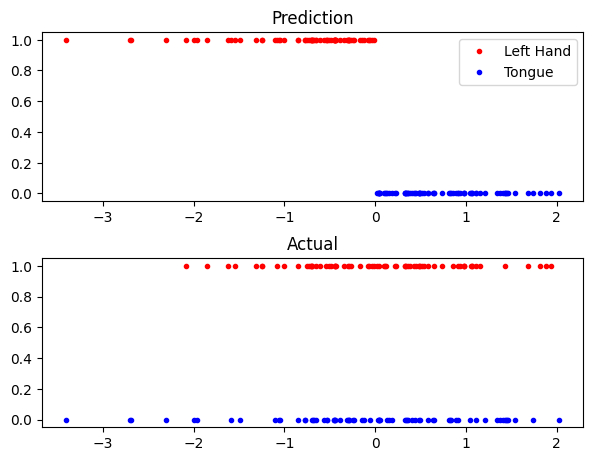

In [7]:
# Implement LDA
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

# Scale features
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

p_pred =  X_test[y_pred == 1] 
n_pred =  X_test[y_pred == 3] 

p_act =  X_test[y_test == 1] 
n_act =  X_test[y_test == 3]

fig, axs = plt.subplots(2)
fig.tight_layout(pad=2.0)
axs[0].plot(p_pred,np.ones(len(p_pred)),'r.')
axs[0].plot(n_pred,np.zeros(len(n_pred)),'b.')
axs[0].title.set_text('Prediction')
axs[0].legend(['Left Hand','Tongue'],loc='upper right')

axs[1].plot(p_act,np.ones(len(p_act)),'r.')
axs[1].plot(n_act,np.zeros(len(n_act)),'b.')
axs[1].title.set_text('Actual')